In [1]:
import praw
import pandas as pd
import numpy as np
# nltk - natural langauge processing
# wordcloud - for drawing word cloud
# matplotlib - for charting
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice

In [2]:
# SMU Applications 2022 Megathread
reddit = praw.Reddit(client_id='Uqa0qPvYrRATm6WB2yy6vw', client_secret='ExLLWnJZrEJ5XrSdU9GQ074YOoOg5A', user_agent='sentiment')

In [3]:
submission = reddit.submission(url="https://www.reddit.com/r/SGExams/comments/syg1xp/uni_smu_applications_2022_megathread/")

In [4]:
data = {
  "top_level_comment": [],
  "subcomments": []
}

submission.comments.replace_more(limit=None)

for top_level_comment in submission.comments:
    fullstring = top_level_comment.body
    
    if "cs" in fullstring.lower() or "cs" in fullstring.lower() or "scis" in fullstring.lower() or "IS" in fullstring:
#         print("")
#         print("COMMENT:")
#         print(top_level_comment.body)
        data["top_level_comment"].append(top_level_comment.body)
                
        top_level_replies = []
        top_level_replies.extend(top_level_comment.replies)
        subcomments_array = []
        
        while top_level_replies:
            second_level_reply = top_level_replies.pop(0)
#             print("")
#             print("    SUBCOMMENT:")
#             print("    " + second_level_reply.body)
            subcomments_array.append(second_level_reply.body)
        
#         print('')
#         print("------------------------------------------")
        
        data['subcomments'].append(subcomments_array)
    else:
        pass

In [5]:
df = pd.DataFrame(data)

# print(df) 
df.head()

,top_level_comment,subcomments
0,Hi has anyone from JC applying for CS receive ...,"[Yup just got the email!, Yep I got the email ..."
1,hi. I got 81.25 rp. can I make it to cs and is...,[No harm trying! Demand changes every year.]
2,Anyone knows if I’m rejected from smu scholars...,[]
3,anyone else smu cs discovery day?,"[hiii, Hii just got my cs dd email :)]"
4,Hi anyone received economics discovery day or ...,[Curious to know too…]


Hi has anyone from JC applying for CS receive discovery day?
hi. I got 81.25 rp. can I make it to cs and is? maybe econs too?
Anyone knows if I’m rejected from smu scholarships? I attended discovery day for cs on 26 mar and received cs offer on 28 mar.
anyone else smu cs discovery day?
Hi anyone received economics discovery day or interview yet?
hi anybody with 87.5 rp n above got discovery day/interview from cs?
when is CS discovery day? anyone from poly getting CS discovery day invites?
hi how is smu CS and IS? I heard its not quite well established as compared to nus and ntu. how do they differ? And are the computing courses good?
hi did anyone receive a call that they got shortlisted for an interview for economics ?
Has anyone received an offer from IS? 😬
What are my chances for SMU IS? 

The IGP was 3.7 and my final gpa is 3.73.
anyone else received interview for IS? (For jc peeps)
Has any transfer applicant received a reply for IS?
Has anyone from JC/Poly gotten any offers/interv

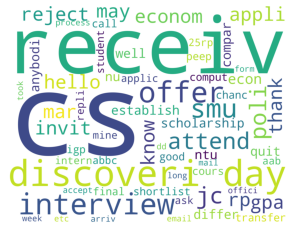

In [6]:
stop_words = stopwords.words('english')
stop_words.extend(['yet', 'make', 'heard', 'mean', 'hi', 'ha', 'got', 'gotten','maybe','else', 'anybodi', 'anyone'])

# for (columnName, columnData) in oe_qn.iteritems():
qn_content = ''
for line in data['top_level_comment']:
    if len(line.strip()) > 0: # Eliminates empty answers
        qn_content += line.lower() + ' '    
        print(line)

    # Tokenize Words
    tokenizer = RegexpTokenizer(r'\w+')
    words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words
    #print(words_content)
    #print(len(words_content))

    # Remove stop words
    words_filtered = []
    for w in words_content:
        if w not in stop_words:
            words_filtered.append(w)

    #print(words_filtered)
    #print(len(words_filtered))

    # Porter Stemmer
    porter_stemmer = PorterStemmer()

    words_stemmed = []
    for w in words_filtered:
        words_stemmed.append(porter_stemmer.stem(w))

    #print(words_stemmed)

    # WordCloud
    words_joined = " ".join([w for w in words_stemmed])

    # Create a word cloud
    my_wordcloud = WordCloud(background_color='white',
                         width=1800,
                         height=1400).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
#     plt.title(columnName)
# plt.savefig(columnName, dpi=300)

Yup just got the email!
Yep I got the email too a few days ago
No harm trying! Demand changes every year.
hiii
Hii just got my cs dd email :)
Curious to know too…
It’s 26 March, ytd, some of my friends got CS DD alr
smu IS rp 78, NUS IS rp 85 based on GES, both starting salary at 4.5k lol
Hii I just got my dd email! :)
Hi, recevied offer for IS Discovery Day
Both of my friend have recieved , while i am still waiting :/
I just received an interview invitation, was from poly
81.25rp too. Also nvr get the invitation for discovery day for CS but from sg
Hi, have been offered IS. my cGPA is 3.77
i went for IS DD earlier today! my cgpa is 3.77
if it helps, i attended BBM DD last sat and haven't gotten my offer as well. though some people already got theirs though
hi in the exact same course and situation as you


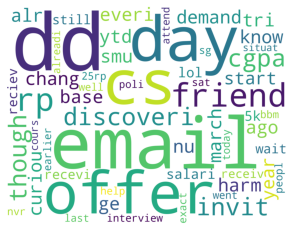

In [7]:
stop_words = stopwords.words('english')
stop_words.extend(['yet', 'yep', 'hi','hii','hiii', 'yup', 'make', 'heard', 'mean', 'hi', 'ha', 'got', 'gotten','maybe',
                   'else', 'anybodi'])

# for (columnName, columnData) in oe_qn.iteritems():
qn_content = ''
for line in data['subcomments']:
    for sentence in line:
        if len(sentence.strip()) > 0: # Eliminates empty answers
            qn_content += sentence.lower() + ' '    
            print(sentence)

    # Tokenize Words
    tokenizer = RegexpTokenizer(r'\w+')
    words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words
    #print(words_content)
    #print(len(words_content))

    # Remove stop words
    words_filtered = []
    for w in words_content:
        if w not in stop_words:
            words_filtered.append(w)

    #print(words_filtered)
    #print(len(words_filtered))

    # Porter Stemmer
    porter_stemmer = PorterStemmer()

    words_stemmed = []
    for w in words_filtered:
        words_stemmed.append(porter_stemmer.stem(w))

    #print(words_stemmed)

    # WordCloud
    words_joined = " ".join([w for w in words_stemmed])

    # Create a word cloud
    my_wordcloud = WordCloud(background_color='white',
                         width=1800,
                         height=1400).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
#     plt.title(columnName)
# plt.savefig(columnName, dpi=300)